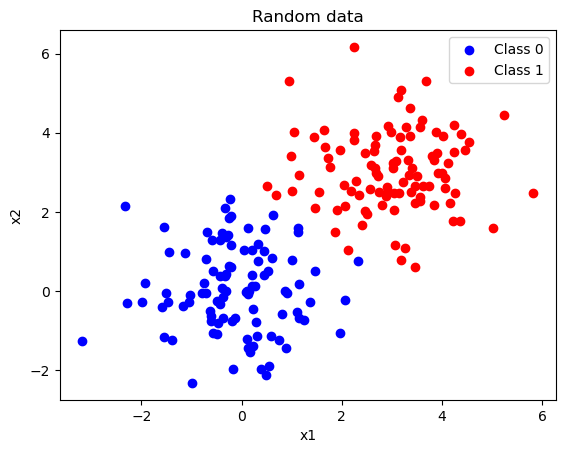

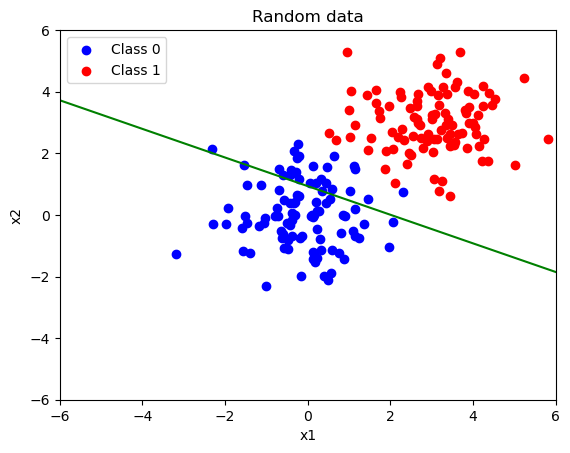

[5.22519939 4.4607527  1.        ] [1.]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[-0.99060308]
[0.27079297]


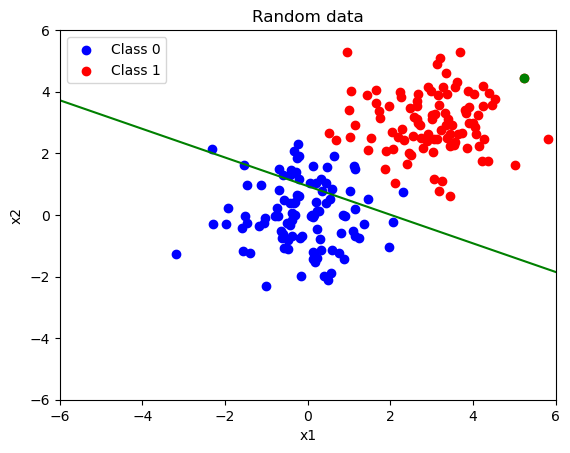

[[193.04883262]]
[[-194.29095   ]
 [-151.34759585]
 [   9.2416886 ]]
[[-0.51162868]
 [ 0.25447195]
 [ 0.54762232]]
(3, 1)
(3, 1)


In [2]:
# generate random data with classes.
# Create a cloud of points centered around 0,0

import numpy as np
import matplotlib.pyplot as plt
import random

# number of points
n = 100

# generate random data
x1_1 = np.random.randn(n)
x2_1 = np.random.randn(n)
x1_2 = np.random.randn(n) + 3
x2_2 = np.random.randn(n) + 3

# create a list of colors
colors = ['b', 'r']

# create a list of classes
classes = ['Class 0', 'Class 1']

# combine into numpy array
X = np.array([np.concatenate((x1_1, x1_2)), np.concatenate((x2_1, x2_2)), np.ones(2*n)])

Y = np.array([np.zeros(n), np.ones(n)]).flatten().reshape(1, 2*n)

# plot data
for i in range(2):
    plt.scatter(X[0, i*n:(i+1)*n], X[1, i*n:(i+1)*n], c=colors[i], label=classes[i])
    
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Random data')
plt.legend()
plt.show()
# random theta for the line of binary classification
theta1 = random.uniform(-1, 1)
theta2 = random.uniform(-1, 1)
theta_0 = random.uniform(-1, 1)
W = np.array([theta_0, theta1, theta2]).reshape(3, 1)

# plot data
for i in range(2):
    plt.scatter(X[0, i*n:(i+1)*n], X[1, i*n:(i+1)*n], c=colors[i], label=classes[i])
    
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Random data')
plt.legend()

# plot the line
x = np.linspace(-10, 10, 100)
y = (-W[1]*x - W[0])/W[2]
plt.plot(x, y, 'g')

#fix the axes to be between -6 and 6
plt.xlim(-6, 6)
plt.ylim(-6, 6)


plt.show()
def sigmoid(x):
    return 1/(1+np.exp(-x))

#sample point from the data
sample_point = X[:, 155]
sample_point_class = Y[:, 155]

print(sample_point, sample_point_class)
print(type(sample_point), type(sample_point_class))
print(W.T.dot(sample_point))
print(sigmoid(W.T.dot(sample_point)))

# plot data
for i in range(2):
    plt.scatter(X[0, i*n:(i+1)*n], X[1, i*n:(i+1)*n], c=colors[i], label=classes[i])
    
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Random data')
plt.legend()

# plot the line
x = np.linspace(-10, 10, 100)
y = (-W[1]*x - W[0])/W[2]
plt.plot(x, y, 'g')

# plot the sample point green
plt.scatter(sample_point[0], sample_point[1], c='g')

#fix the axes to be between -6 and 6
plt.xlim(-6, 6)
plt.ylim(-6, 6)


plt.show()
# compute the loss for the line
def binary_cross_entropy(W, X, Y):
    loss = 0
    try:
        for i in range(len(Y)):
            loss += -Y[i]*np.log(sigmoid(W.dot(X[:, i]))) - (1-Y[i])*np.log(1-sigmoid(W.dot(X[:, i])))
    except:
        loss = -Y*np.log(sigmoid(W.dot(X))) - (1-Y)*np.log(1-sigmoid(W.dot(X)))
    return loss

def binary_cross_entropy_alt(W, X, Y):
    z = X.T.dot(W)
    p = sigmoid(z)
    p = np.clip(p, 1e-10, 1 - 1e-10)  # Clipping to avoid log(0)
    loss = -Y.dot(np.log(p)) - (1-Y).dot(np.log(1-p))
    return loss


def binary_cross_entropy_gradient(W, X, Y):
    p = sigmoid(W.T.dot(X))
    e = p - Y
    gradient = X.dot(e.T)
    return gradient
    

print(binary_cross_entropy_alt(W, X, Y))
print(binary_cross_entropy_gradient(W, X, Y))
print(W)
print(W.shape)
print(binary_cross_entropy_gradient(W, X, Y).shape)


In [3]:
import imageio
import os

n_steps = 100
alpha = 0.01
frames_dir = "./images"
os.makedirs(frames_dir, exist_ok=True)

# Prepare the grid for loss calculation
W0_vals = np.linspace(-1, 1, 100)
W1_vals = np.linspace(-1, 1, 100)
W0, W1 = np.meshgrid(W0_vals, W1_vals)
J_vals = np.zeros_like(W0)

# Calculate the loss over the grid for visualization
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        W_temp = np.array([[W0[i, j]], [W1[i, j]]])
        J_vals[i, j] = binary_cross_entropy_alt(W_temp, X, Y)

path = []  # To store the optimization path

frame_paths = []  # To store paths to individual frames for cleanup

for step in range(n_steps):
    gradient = binary_cross_entropy_gradient(W, X, Y)
    W = W - alpha * gradient
    loss = binary_cross_entropy_alt(W, X, Y)[0][0]
    path.append((W[0, 0], W[1, 0], loss))

    # Generate plots for the current step
    fig = plt.figure(figsize=(18, 6))
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132, projection='3d')
    ax3 = fig.add_subplot(133)
    
    # Plot the data and the boundary
    for i in range(2):
        ax1.scatter(X[0, i*n:(i+1)*n], X[1, i*n:(i+1)*n], c=colors[i], label=classes[i])
        
    x = np.linspace(-10, 10, 100)
    y = (-W[1]*x - W[0])/W[2]
    ax1.plot(x, y, 'g')
    # Adjust ax1 plot limits
    ax1.set_xlim([-6, 6])
    ax1.set_ylim([-6, 6])
    # 3D surface plot on ax2
    ax2.plot_surface(W0, W1, J_vals, cmap='viridis', alpha=0.6)
    ax2.set_xlabel('Weight 0')
    ax2.set_ylabel('Weight 1')
    ax2.set_zlabel('Loss')

    # Plot the optimization path on ax2, ensuring data is correctly formatted for 3D plotting
    if len(path) > 0:
        # Ensure x_path, y_path, z_path are 1D arrays for plotting
        x_path, y_path, z_path = zip(*path)
        x_path = np.array(x_path)
        y_path = np.array(y_path)
        z_path = np.array(z_path)
        ax2.plot(x_path, y_path, z_path, 'r-', label='Path')
    else:
        pass

    
    # Contour plot
    contour = ax3.contour(W0, W1, J_vals, 50, cmap='viridis')
    ax3.set_xlabel('Weight 0')
    ax3.set_ylabel('Weight 1')
    ax3.plot(x_path, y_path, 'ro-')
    
    # Save the frame
    frame_path = f"{frames_dir}/frame_{step:03d}.png"
    plt.savefig(frame_path)
    frame_paths.append(frame_path)
    plt.close(fig)
    
# Create GIF
frames = [imageio.imread(frame_path) for frame_path in frame_paths]
imageio.mimsave('binary_classification_animation.gif', frames, fps=10)



ValueError: shapes (200,3) and (2,1) not aligned: 3 (dim 1) != 2 (dim 0)

In [ ]:
# Cleanup
for frame_path in frame_paths:
    os.remove(frame_path)